History: created on 17/11/2020. Last modif: *Simplified new version of mw_protocol* on 28/10/2022. Up to Date(28/10/2022)

In [1]:
%matplotlib inline
import cartopy.feature
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import glac_mw.plotting as plotting
import glac_mw.saving as saving
import glac_mw.routing as routing
import glac_mw.spreading as spreading
import glac_mw.plotting as plotting
import glac_mw.glac1d_toolbox as tb
import datetime
import SCM6
import pylaeoclim_leeds.hadcm3_processing as hadcm3
import pylaeoclim_leeds.util_hadcm3 as util
import mw_protocol.plotting as plotting


ModuleNotFoundError: No module named 'glac_mw'

## Create Input Files

List of different methods to create outputfiles to be then used in 

In [2]:
ds_ref = xr.open_dataset('/nfs/see-fs-01_users/eeymr/dump2hold/xoupa/pg/xoupao#pg000003000c1+.nc')
surface = tb.surface_matrix(ds_ref.longitude,ds_ref.latitude)
surface_total = np.nansum(surface)
print(f"Surface totale : {surface_total*10**-12}")
ro = 1000

Surface totale : 510.06447190978827


### Main method

This is the method to create a spreaded but non corrected input file. First, create the discharge file, then spread it and at last turn it into a waterfix-like file with time evolving discarge.

In [3]:
ds_hice = xr.open_dataset('/nfs/annie/eeymr/work/data/glac_mw/GLAC1DHiceF26.nc')
ds_pointer = xr.open_dataset('/nfs/annie/eeymr/work/data/glac_mw/GLAC1DdrainagePointerF26ka.nc')
ds_wfix = xr.open_dataset("/nfs/annie/earpal/database/experiments/temev/inidata/temev.qrparm.waterfix.nc")
ds_lsm = xr.open_dataset("/nfs/annie/earpal/database/experiments/temev/inidata/temev.qrparm.omask.nc")

<xarray.DataArray 'field672' (t: 1, depth: 1, latitude: 144, longitude: 290)>
array([[[[nan, ..., nan],
         ...,
         [nan, ..., nan]]]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 0.0 1.25 2.5 3.75 ... 358.75 360.0 361.25
  * latitude   (latitude) float32 -89.375 -88.125 -86.875 ... 88.125 89.375
  * depth      (depth) float32 5.0
  * t          (t) object 1800-12-01 00:00:00
Attributes:
    source:     Unified Model Output (Vn 4.1):
    name:       field672
    title:      OCtr/ Anomalous salt flux.
    date:       01/12/00
    time:       00:00
    long_name:  OCtr/ Anomalous salt flux.
    units:      kg m-2 s-1
    valid_min:  1.1290996e-07
    valid_max:  1.943562e-06


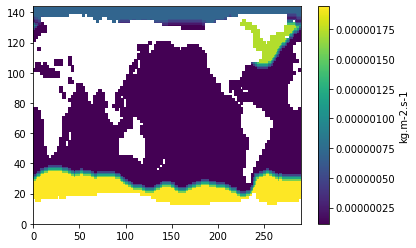

In [3]:
print(ds_wfix.field672)
plt.pcolormesh(ds_wfix.field672.isel(t=0).isel(depth=0))
plt.colorbar(label="kg.m-2.s-1")

In [4]:
routed_mw = routing.routing(ds_hice, ds_pointer, ds_lsm, mode_flux="m3/s", mode_lon="double",
                            mode_shape="cross", mode_smooth="differential", t_debug=11)
routed_mw

__ Routing algorithm
Reuse existing file: conservative_720x720_144x288.nc
____ Computation time step : 0.
____ Routing method.
____ Overlapping method with double-cross mode.
____ Applying mask processing with differential mode.
____ Computation time step : 1.
____ Routing method.
____ Overlapping method with double-cross mode.
____ Applying mask processing with differential mode.
____ Computation time step : 2.
____ Routing method.
____ Overlapping method with double-cross mode.
____ Applying mask processing with differential mode.
____ Computation time step : 3.
____ Routing method.
____ Overlapping method with double-cross mode.
____ Applying mask processing with differential mode.
____ Computation time step : 4.
____ Routing method.
____ Overlapping method with double-cross mode.
____ Applying mask processing with differential mode.
____ Computation time step : 5.
____ Routing method.
____ Overlapping method with double-cross mode.
____ Applying mask processing with differential mo

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

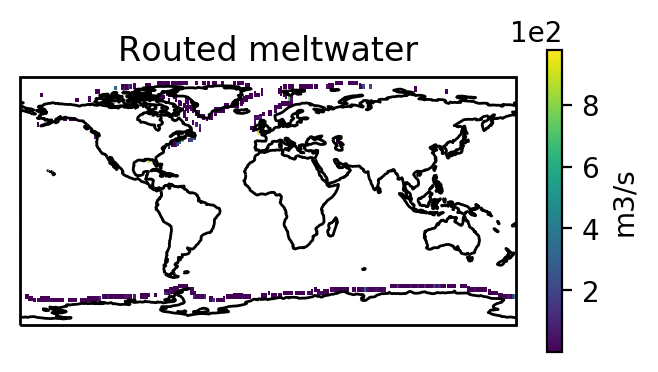

In [7]:
projection_map = ccrs.PlateCarree()
figMap,axMap = plt.subplots(nrows=1, ncols=1, subplot_kw={'projection':projection_map}, figsize=(4,4), dpi=200)

cm = axMap.pcolormesh(ds_wfix.longitude[:-2], ds_wfix.latitude, np.where(routed_mw[0]==0, np.NAN, routed_mw[0]), transform=ccrs.PlateCarree())
axMap.set_global()
axMap.coastlines()
axMap.set_title("Routed meltwater")
cb = figMap.colorbar(mappable=cm, ax=axMap, label="m3/s", shrink=0.5)
cb.formatter.set_powerlimits((0, 0))
cb.ax.yaxis.set_offset_position('right')                         
cb.update_ticks()

In [8]:
spreaded_mw = spreading.spreading(routed_mw, ds_lsm, ds_wfix)
spreaded_mw

__ Spreading algorithm
____ Spreading in {'name': 'US_East_Coast', 'loc': 147 ocean cells in the region, 'region': 125 ocean cells in the region}
____ Spreading in {'name': 'Greenland_Arctic', 'loc': 163 ocean cells in the region, 'region': 163 ocean cells in the region}
____ Spreading in {'name': 'N_American_Arctic', 'loc': 390 ocean cells in the region, 'region': 355 ocean cells in the region}
____ Spreading in {'name': 'Gulf_of_Mexico', 'loc': 96 ocean cells in the region, 'region': 72 ocean cells in the region}
____ Spreading in {'name': 'East_Pacific', 'loc': 292 ocean cells in the region, 'region': 270 ocean cells in the region}
____ Spreading in {'name': 'Russia_Pacific', 'loc': 21 ocean cells in the region, 'region': 12 ocean cells in the region}
____ Spreading in {'name': 'LabradorSea_BaffinBay', 'loc': 228 ocean cells in the region, 'region': 175 ocean cells in the region}
____ Spreading in {'name': 'Atlantic_GreenlandIceland', 'loc': 116 ocean cells in the region, 'region': 

array([[[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.74170156, 0.74170156, 0.74170156, ..., 0.74170156,
         0.74170156, 0.74170156],
        [0.44516218, 0.44516218, 0.44516218, ..., 0.44516218,
         0.44516218, 0.44516218],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ]],

       [[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.74170156, 0.74170156, 0.74170156, ..., 0.74170156,
         0.74170156, 0.74170156],
        [0.4

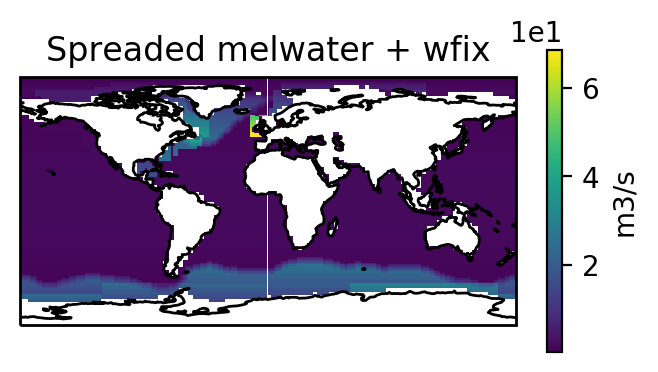

In [9]:
projection_map = ccrs.PlateCarree()
figMap,axMap = plt.subplots(nrows=1, ncols=1, subplot_kw={'projection':projection_map}, figsize=(4,4), dpi=200)

cm = axMap.pcolormesh(ds_wfix.longitude[:-2], ds_wfix.latitude, np.where(spreaded_mw[9]==0, np.NAN, spreaded_mw[0]), transform=ccrs.PlateCarree())
axMap.set_global()
axMap.coastlines()
axMap.set_title("Spreaded melwater + wfix")
cb = figMap.colorbar(mappable=cm, ax=axMap, label="m3/s", shrink=0.5)
cb.formatter.set_powerlimits((0, 0))
cb.ax.yaxis.set_offset_position('right')                         
cb.update_ticks()

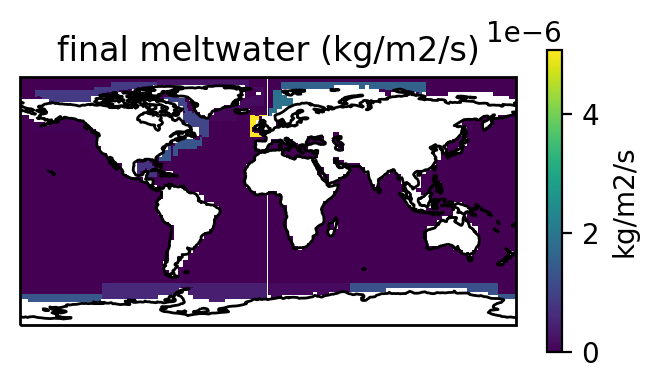

In [11]:
# We then need to convert it back to the waterfix unit (kg/m2/s-1), which is done autmatically in the saving functions

dishcarge_final= saving.masking_method(saving.m3s_to_kgm2s(spreaded_mw, ds_wfix.longitude[:-2], ds_wfix.latitude), ds_lsm.lsm.values)

projection_map = ccrs.PlateCarree()
figMap,axMap = plt.subplots(nrows=1, ncols=1, subplot_kw={'projection':projection_map}, figsize=(4,4), dpi=200)

cm = axMap.pcolormesh(ds_wfix.longitude[:-2], ds_wfix.latitude, dishcarge_final[0] - ds_wfix.field672.isel(t=0).isel(depth=0)[:,:-2], transform=ccrs.PlateCarree())
axMap.set_global()
axMap.coastlines()
axMap.set_title("final meltwater (kg/m2/s)")
cb = figMap.colorbar(mappable=cm, ax=axMap, label="kg/m2/s", shrink=0.5)
cb.formatter.set_powerlimits((0, 0))
cb.ax.yaxis.set_offset_position('right')                         
cb.update_ticks()

In [12]:
sav_folder = "/nfs/annie/eeymr/work/outputs/glac_mw/xoup"
saving.discharge2input(spreaded_mw, ds_lsm, ds_wfix, 'xoup', 'temev', 'spreaded', -26, -25, 100,
                 "xoup.wfix.test.nc", sav_folder, mode_smooth="diff", time_shift=100000)

__ Saving at: /nfs/annie/eeymr/work/outputs/glac_mw/xoup/xoup.wfix.test.nc


<xarray.Dataset>
Dimensions:    (latitude: 144, longitude: 288, t: 11)
Coordinates:
  * t          (t) int64 74000 74100 74200 74300 ... 74700 74800 74900 75000
  * latitude   (latitude) float32 -89.375 -88.125 -86.875 ... 88.125 89.375
  * longitude  (longitude) float32 0.0 1.25 2.5 3.75 ... 356.25 357.5 358.75
Data variables:
    discharge  (t, latitude, longitude) float64 nan nan nan nan ... nan nan nan
Attributes:
    title:        Waterfix initially created for xoup HadCM3 experiment.- tem...
    start_year:   -26
    end_year:     -25
    step:         100
    mode:         spreaded
    mode_smooth:  diff
    lsm:          temev
    history:      Created 2021-01-13 11:59:17.835682 by Yvan Romé

Quick checkup:

In [23]:
ds_discharge = xr.open_dataset("/nfs/annie/eeymr/work/outputs/glac_mw/xoup/xoup.wfix.glac_ts.shift.nc", decode_times=False)
ds_discharge

<xarray.Dataset>
Dimensions:    (latitude: 144, longitude: 288, t: 261)
Coordinates:
  * t          (t) int64 74000 74100 74200 74300 ... 99700 99800 99900 100000
  * latitude   (latitude) float32 -89.375 -88.125 -86.875 ... 88.125 89.375
  * longitude  (longitude) float32 0.0 1.25 2.5 3.75 ... 356.25 357.5 358.75
Data variables:
    discharge  (t, latitude, longitude) float64 ...
Attributes:
    title:        Waterfix initially created for xoup HadCM3 experiment.- tem...
    start_year:   -26
    end_year:     0
    step:         100
    mode:         spreaded
    mode_smooth:  diff
    lsm:          temev
    history:      Created 2021-01-13 12:36:10.877032 by Yvan Romé

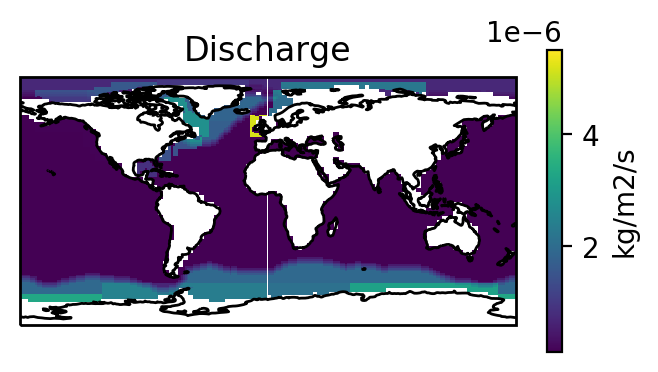

In [24]:
projection_map = ccrs.PlateCarree()
figMap,axMap = plt.subplots(nrows=1, ncols=1, subplot_kw={'projection':projection_map}, figsize=(4,4), dpi=200)

cm = axMap.pcolormesh(ds_discharge.longitude, ds_discharge.latitude, ds_discharge.discharge.values[0], transform=ccrs.PlateCarree())
axMap.set_global()
axMap.coastlines()
axMap.set_title("Discharge")
cb = figMap.colorbar(mappable=cm, ax=axMap, label="kg/m2/s", shrink=0.5)
cb.formatter.set_powerlimits((0, 0))
cb.ax.yaxis.set_offset_position('right')                         
cb.update_ticks()

In [25]:
ds_lsm = xr.open_dataset('/nfs/annie/earpal/database/experiments/temev/inidata/temev.qrparm.omask.nc')
ds_waterfix = xr.open_dataset("/nfs/annie/eeymr/work/data/glac_mw/qrparm.waterfix.hadcm3.nc")

ts = plotting.create_discharge_ts(ds_discharge, ds_lsm, ds_waterfix, unit="kg/m2/s")
t = ds_discharge.t.values

flux_na = ts['North_Atlantic']
flux_ns = ts['Nordic seas']
flux_med = ts['Mediterranean']
flux_arc = ts['Arctic']
flux_ss = ts['Southern seas']
flux_pac = ts['Pacific']
flux_tot = ts['Total']

<generator object create_discharge_ts.<locals>.<genexpr> at 0x2abfe280c350>


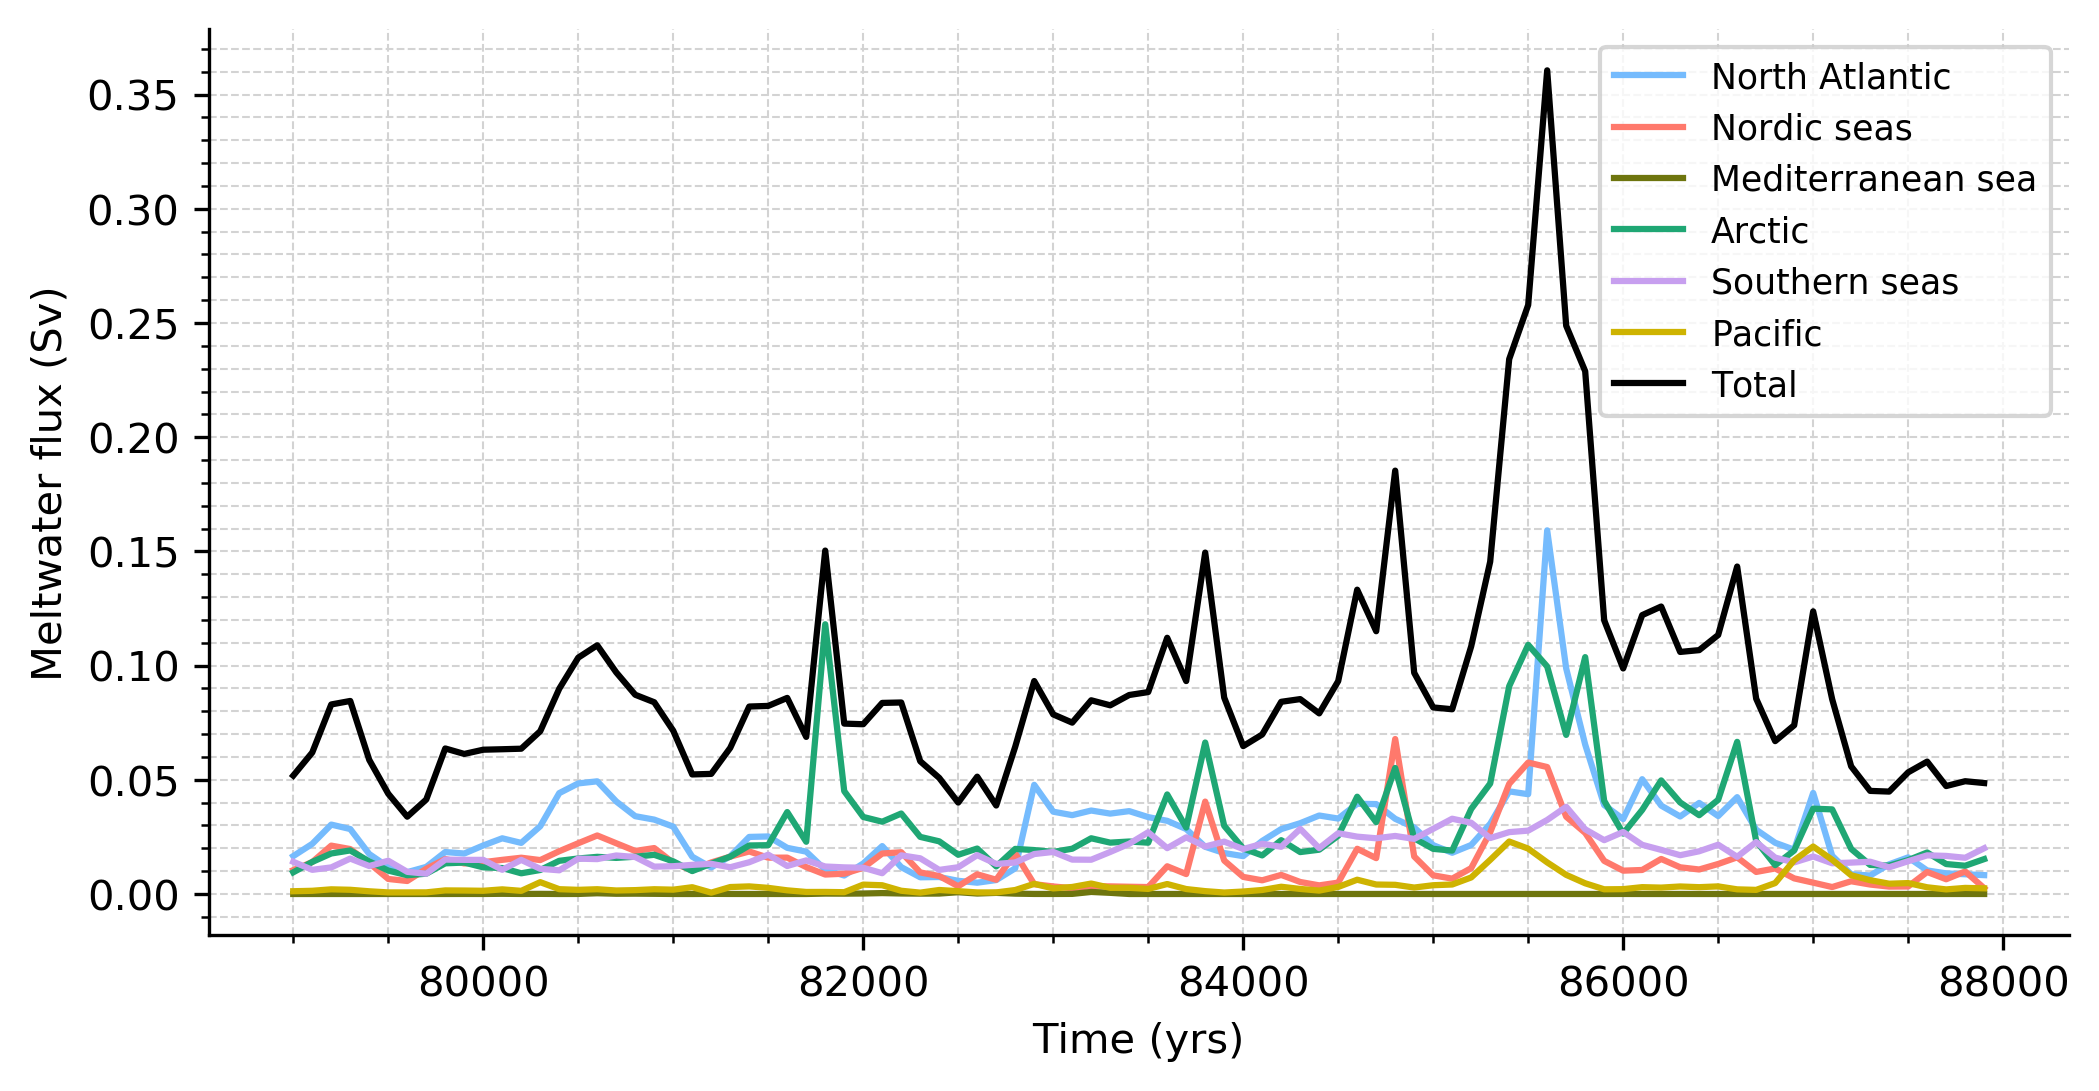

In [26]:
start, end = 0, 140

figMap, axMw = plt.subplots(nrows=1, ncols=1, figsize=(8,4), dpi=300)

axMw.plot(t[start:end], flux_na[start:end], label="North Atlantic", color="xkcd:sky blue", linestyle="-")
axMw.plot(t[start:end], flux_ns[start:end], label="Nordic seas", color="xkcd:salmon", linestyle="-")
axMw.plot(t[start:end], flux_med[start:end], label="Mediterranean sea", color="xkcd:olive", linestyle="-")
axMw.plot(t[start:end], flux_arc[start:end], label="Arctic", color="xkcd:jade", linestyle="-")
axMw.plot(t[start:end], flux_ss[start:end], label="Southern seas", color="xkcd:lavender", linestyle="-")
axMw.plot(t[start:end], flux_pac[start:end], label="Pacific", color="xkcd:mustard", linestyle="-")
axMw.plot(t[start:end], flux_tot[start:end], label="Total", color="black", linestyle="-")

axMw.legend(loc="upper right", fontsize='small')
axMw.spines['right'].set_visible(False)
axMw.spines['top'].set_visible(False)
axMw.set_xlabel("Time (yrs)")
axMw.set_ylabel("Meltwater flux (Sv)")
axMw.minorticks_on()
axMw.grid(which = "both", color='lightgrey', linestyle='--', linewidth=0.5)

We can then also create a 21k starting file:

In [27]:
sav_folder = "/nfs/annie/eeymr/work/outputs/glac_mw/xoup"
ds_discharge_21 = saving.process_discharge_time(ds_discharge, ds_lsm, 'xoup', 'xoup.wfix.glac_21_0.shift.nc', sav_folder, new_start_year=-21, new_end_year=0, time_shift=100000)
ds_discharge_21

__ Saving at: /nfs/annie/eeymr/work/outputs/glac_mw/xoup/xoup.wfix.glac_21_0.shift.nc


<xarray.Dataset>
Dimensions:    (latitude: 144, longitude: 288, t: 211)
Coordinates:
  * t          (t) int64 79000 79100 79200 79300 ... 99700 99800 99900 100000
  * latitude   (latitude) float32 -89.375 -88.125 -86.875 ... 88.125 89.375
  * longitude  (longitude) float32 0.0 1.25 2.5 3.75 ... 356.25 357.5 358.75
Data variables:
    discharge  (t, latitude, longitude) float64 nan nan nan nan ... nan nan nan
Attributes:
    title:        Waterfix initially created for xoup HadCM3 experiment.- tem...
    start_year:   -21
    end_year:     0
    step:         100
    mode:         spreaded
    mode_smooth:  diff
    lsm:          temev
    history:      Created 2021-01-13 12:52:39.853243 by Yvan Romé

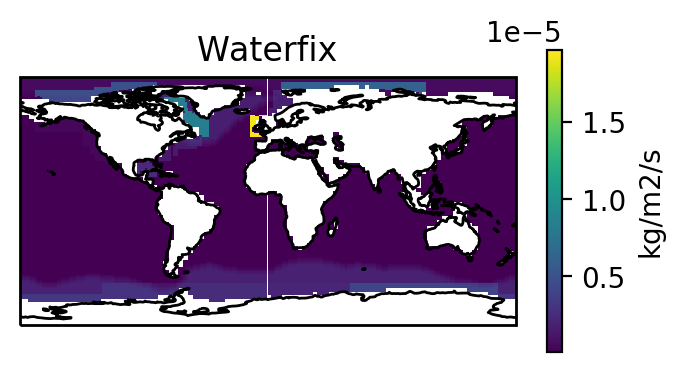

In [29]:
projection_map = ccrs.PlateCarree()
figMap,axMap = plt.subplots(nrows=1, ncols=1, subplot_kw={'projection':projection_map}, figsize=(4,4), dpi=200)

cm = axMap.pcolormesh(ds_discharge_21.longitude, ds_discharge_21.latitude, ds_discharge_21.discharge.values[0], transform=ccrs.PlateCarree())
axMap.set_global()
axMap.coastlines()
axMap.set_title("Waterfix")
cb = figMap.colorbar(mappable=cm, ax=axMap, label="kg/m2/s", shrink=0.5)
cb.formatter.set_powerlimits((0, 0))
cb.ax.yaxis.set_offset_position('right')                         
cb.update_ticks()

### Correction patch

<xarray.Dataset>
Dimensions:    (depth: 1, latitude: 144, longitude: 290, t: 1)
Coordinates:
  * longitude  (longitude) float32 0.0 1.25 2.5 3.75 ... 358.75 360.0 361.25
  * latitude   (latitude) float32 -89.375 -88.125 -86.875 ... 88.125 89.375
  * depth      (depth) float32 5.0
  * t          (t) object 1800-12-01 00:00:00
Data variables:
    field672   (t, depth, latitude, longitude) float32 ...
Attributes:
    history:  Thu Jan 18 08:19:59 GMT 2018 - CONVSH V1.91 16-February-2006
Waterfix flux (Sv): 0.11246255767873915


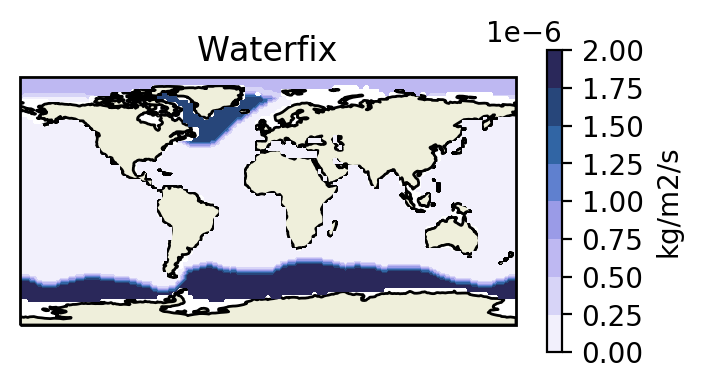

In [3]:
ds_wfix = xr.open_dataset('/nfs/annie/earpal/database/experiments/temev/inidata/temev.qrparm.waterfix.nc')
print(ds_wfix)
print(f"Waterfix flux (Sv): {np.nansum(ds_wfix.field672.isel(t=0).isel(depth=0).values[:,:-2]*surface/ro*10**-6)}")

projection_map = ccrs.PlateCarree()
figMap,axMap = plt.subplots(nrows=1, ncols=1, subplot_kw={'projection':projection_map}, figsize=(4,4), dpi=200)

cm = axMap.contourf(ds_wfix.longitude, ds_wfix.latitude, ds_wfix.field672.isel(t=0).isel(depth=0), transform=ccrs.PlateCarree(), cmap=SCM6.devon.reversed())
axMap.set_global()
axMap.add_feature(cartopy.feature.LAND, zorder=0, edgecolor='black')
axMap.set_title("Waterfix")
cb = figMap.colorbar(mappable=cm, ax=axMap, label="kg/m2/s", shrink=0.5)
cb.formatter.set_powerlimits((0, 0))
cb.ax.yaxis.set_offset_position('right')                         
cb.update_ticks()

<xarray.Dataset>
Dimensions:             (depth: 19, depth_1: 20, latitude: 144, latitude_1: 143, longitude: 288, longitude_1: 288, t: 1, unspecified: 1)
Coordinates:
  * longitude           (longitude) float32 0.0 1.25 2.5 ... 356.25 357.5 358.75
  * latitude            (latitude) float32 -89.375 -88.125 ... 88.125 89.375
  * depth               (depth) float32 10.0 20.0 30.0 ... 3654.3 4269.5 4884.8
  * t                   (t) object 3000-06-01 00:00:00
  * unspecified         (unspecified) float32 -1.0
  * depth_1             (depth_1) float32 5.0 15.0 25.0 ... 4577.15 5192.45
  * longitude_1         (longitude_1) float32 0.625 1.875 ... 358.125 359.375
  * latitude_1          (latitude_1) float32 -88.75 -87.5 -86.25 ... 87.5 88.75
Data variables:
    W_ym_dpth           (t, depth, latitude, longitude) float32 ...
    srfSalFlux_ym_uo    (t, unspecified, latitude, longitude) float32 ...
    insitu_T_ym_dpth    (t, depth_1, latitude, longitude) float32 ...
    ucurrTot_ym_dpth    (t,

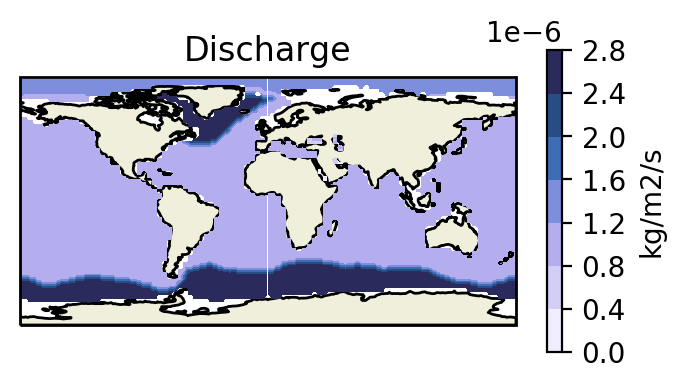

In [4]:
print(ds_ref)
print(f"Discharge flux (Sv): {np.nansum(ds_ref.srfSalFlux_ym_uo_1.isel(t=0).isel(unspecified=0).values*surface/ro*10**-6)}")

projection_map = ccrs.PlateCarree()
figMap,axMap = plt.subplots(nrows=1, ncols=1, subplot_kw={'projection':projection_map}, figsize=(4,4), dpi=200)

cm = axMap.contourf(ds_ref.longitude, ds_ref.latitude, ds_ref.srfSalFlux_ym_uo_1.isel(t=0).isel(unspecified=0), transform=ccrs.PlateCarree(), cmap=SCM6.devon.reversed())
axMap.set_global()
axMap.add_feature(cartopy.feature.LAND, zorder=0, edgecolor='black')
axMap.set_title("Discharge")
cb = figMap.colorbar(mappable=cm, ax=axMap, label="kg/m2/s", shrink=0.5)
cb.formatter.set_powerlimits((0, 0))
cb.ax.yaxis.set_offset_position('right')                         
cb.update_ticks()

We can then compute the patch, which is the salinity correction to cope with salinity drift.

Patch flux (Sv): 0.25406491073526094


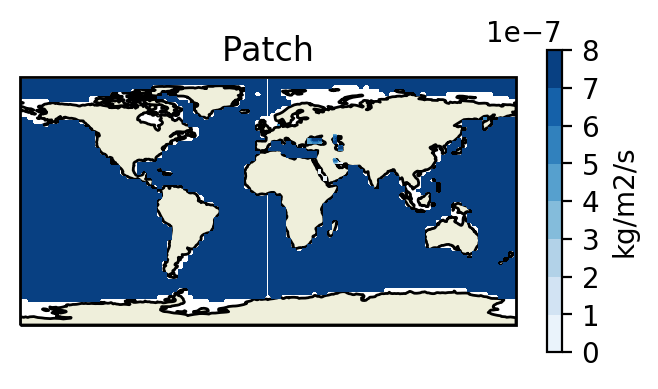

In [5]:
patch = ds_ref.srfSalFlux_ym_uo_1.isel(t=0).isel(unspecified=0) - ds_wfix.field672.isel(t=0).isel(depth=0)
print(f"Patch flux (Sv): {np.nansum(patch.values*surface/ro*10**-6)}")

projection_map = ccrs.PlateCarree()
figMap,axMap = plt.subplots(nrows=1, ncols=1, subplot_kw={'projection':projection_map}, figsize=(4,4), dpi=200)

cm = axMap.contourf(ds_ref.longitude, ds_ref.latitude, patch, transform=ccrs.PlateCarree(), cmap='Blues')
axMap.set_global()
axMap.add_feature(cartopy.feature.LAND, zorder=0, edgecolor='black')
axMap.set_title("Patch")
cb = figMap.colorbar(mappable=cm, ax=axMap, label="kg/m2/s", shrink=0.5)
cb.formatter.set_powerlimits((0, 0))
cb.ax.yaxis.set_offset_position('right')                         
cb.update_ticks()

Does the function works?

In [6]:
patch = saving.calculate_patch('/nfs/see-fs-01_users/eeymr/dump2hold/xoupa/pg/xoupa', ds_wfix, 3000, 3500)
print(f"Patch flux (Sv): {np.nansum(patch*surface/ro*10**-6)}")

____ Computation of the drift patch
Patch flux (Sv): 0.20367297251851363


Everything can be wraped up in a single function:

____ Computation of the drift patch
<xarray.Dataset>
Dimensions:    (depth: 1, latitude: 144, longitude: 290, t: 1)
Coordinates:
  * longitude  (longitude) float32 0.0 1.25 2.5 3.75 ... 358.75 360.0 361.25
  * latitude   (latitude) float32 -89.375 -88.125 -86.875 ... 88.125 89.375
  * depth      (depth) float32 5.0
  * t          (t) object 1800-12-01 00:00:00
Data variables:
    field672   (t, depth, latitude, longitude) float32 nan nan nan ... nan nan
Attributes:
    history:  Created on 2020-11-24 15:49:12.456783 by Yvan Romé
    title:    Waterfix for HadCM3 simulations [GLAC-1D] - Corrected using xou...
Waterfix flux (Sv): 0.31717327740379697


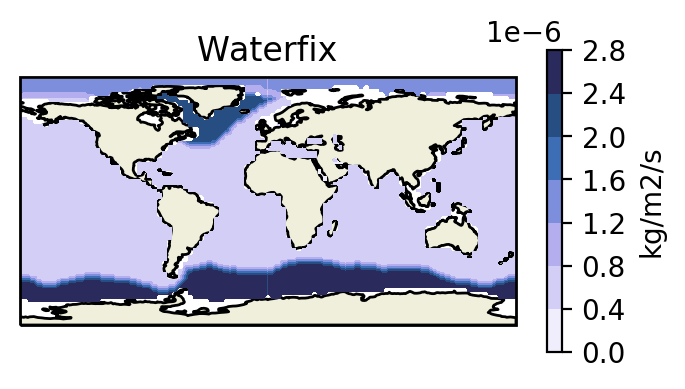

In [7]:
wfix_corrected = saving.create_corrected_waterfix("/nfs/see-fs-01_users/eeymr/dump2hold/xoupa/pg", 'xoupa', 'teadv3', ds_wfix, 1000, 1500)
print(wfix_corrected)
print(f"Waterfix flux (Sv): {np.nansum(wfix_corrected.field672.isel(t=0).isel(depth=0).values[:,:-2]*surface/ro*10**-6)}")

# To save the waterfix:
# wfix_corrected = saving.create_corrected_waterfix("/nfs/see-fs-01_users/eeymr/dump2hold/xoupa/pg", 'xoupa', 'teadv3', ds_wfix, 1000, 3500, sav_path="/nfs/annie/eeymr/work/outputs/proj_glac_mw/wfix_patch/xoupa.wfix.patch.nc")

projection_map = ccrs.PlateCarree()
figMap,axMap = plt.subplots(nrows=1, ncols=1, subplot_kw={'projection':projection_map}, figsize=(4,4), dpi=200)

cm = axMap.contourf(wfix_corrected.longitude, wfix_corrected.latitude, wfix_corrected.field672.isel(t=0).isel(depth=0), transform=ccrs.PlateCarree(), cmap=SCM6.devon.reversed())
axMap.set_global()
axMap.add_feature(cartopy.feature.LAND, zorder=0, edgecolor='black')
axMap.set_title("Waterfix")
cb = figMap.colorbar(mappable=cm, ax=axMap, label="kg/m2/s", shrink=0.5)
cb.formatter.set_powerlimits((0, 0))
cb.ax.yaxis.set_offset_position('right')                         
cb.update_ticks()

Not the same than the discharge flux? Double-check!

Waterfix flux (Sv): -0.049354191010203156


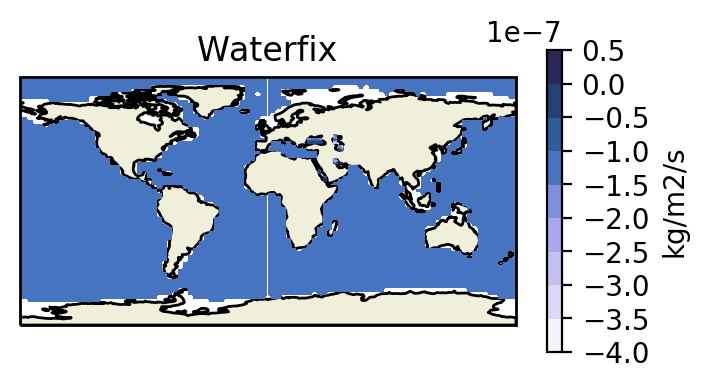

In [8]:
print(f"Waterfix flux (Sv): {np.nansum((wfix_corrected.field672.isel(t=0).isel(depth=0).values[:,:-2] - ds_ref.srfSalFlux_ym_uo_1.isel(t=0).isel(unspecified=0).values)*surface/ro*10**-6)}")

projection_map = ccrs.PlateCarree()
figMap,axMap = plt.subplots(nrows=1, ncols=1, subplot_kw={'projection':projection_map}, figsize=(4,4), dpi=200)

cm = axMap.contourf(ds_ref.longitude, ds_ref.latitude, wfix_corrected.field672.isel(t=0).isel(depth=0).values[:,:-2] - ds_ref.srfSalFlux_ym_uo_1.isel(t=0).isel(unspecified=0).values, transform=ccrs.PlateCarree(), cmap=SCM6.devon.reversed())
axMap.set_global()
axMap.add_feature(cartopy.feature.LAND, zorder=0, edgecolor='black')
axMap.set_title("Waterfix")
cb = figMap.colorbar(mappable=cm, ax=axMap, label="kg/m2/s", shrink=0.5)
cb.formatter.set_powerlimits((0, 0))
cb.ax.yaxis.set_offset_position('right')                         
cb.update_ticks()

## Corrected meltwater file

We first need the corrected waterfix file

<xarray.Dataset>
Dimensions:    (depth: 1, latitude: 144, longitude: 290, t: 1)
Coordinates:
  * longitude  (longitude) float32 0.0 1.25 2.5 3.75 ... 358.75 360.0 361.25
  * latitude   (latitude) float32 -89.375 -88.125 -86.875 ... 88.125 89.375
  * depth      (depth) float32 5.0
  * t          (t) object 1800-12-01 00:00:00
Data variables:
    field672   (t, depth, latitude, longitude) float32 ...
Attributes:
    history:  Created on 2020-11-17 14:52:06.590744 by Yvan Romé
    title:    Waterfix for HadCM3 simulations [GLAC-1D] - Corrected using xou...
Waterfix flux (Sv): 0.3162229916481796


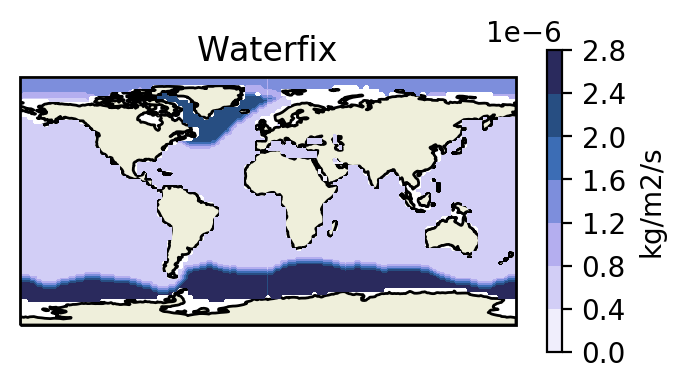

In [9]:
ds_wfix_corrected = xr.open_dataset("/nfs/annie/eeymr/work/outputs/glac_mw/xoup/xoupa.wfix.patch.nc")
print(ds_wfix_corrected)
print(f"Waterfix flux (Sv): {np.nansum(ds_wfix_corrected.field672.isel(t=0).isel(depth=0).values[:,:-2]*surface/ro*10**-6)}")

projection_map = ccrs.PlateCarree()
figMap,axMap = plt.subplots(nrows=1, ncols=1, subplot_kw={'projection':projection_map}, figsize=(4,4), dpi=200)

cm = axMap.contourf(ds_wfix_corrected.longitude, ds_wfix_corrected.latitude, ds_wfix_corrected.field672.isel(t=0).isel(depth=0), transform=ccrs.PlateCarree(), cmap=SCM6.devon.reversed())
axMap.set_global()
axMap.add_feature(cartopy.feature.LAND, zorder=0, edgecolor='black')
axMap.set_title("Waterfix")
cb = figMap.colorbar(mappable=cm, ax=axMap, label="kg/m2/s", shrink=0.5)
cb.formatter.set_powerlimits((0, 0))
cb.ax.yaxis.set_offset_position('right')                         
cb.update_ticks()

And then the uncorrected meltwater file

<xarray.Dataset>
Dimensions:    (latitude: 144, longitude: 288, t: 211)
Coordinates:
  * t          (t) int64 -21000 -20900 -20800 -20700 -20600 ... -300 -200 -100 0
  * latitude   (latitude) float32 -89.375 -88.125 -86.875 ... 88.125 89.375
  * longitude  (longitude) float32 0.0 1.25 2.5 3.75 ... 356.25 357.5 358.75
Data variables:
    discharge  (t, latitude, longitude) float64 ...
Attributes:
    title:        Meltwater discharge for transient GLAC1D last delgaciation ...
    start_year:   -21
    end_year:     0
    step:         100
    mode:         spreaded
    mode_smooth:  diff
    lsm:          temev
    history:      Created 2020-06-11 20:45:24.325024 by Yvan Romé
Waterfix flux (Sv): 0.16428627137523635


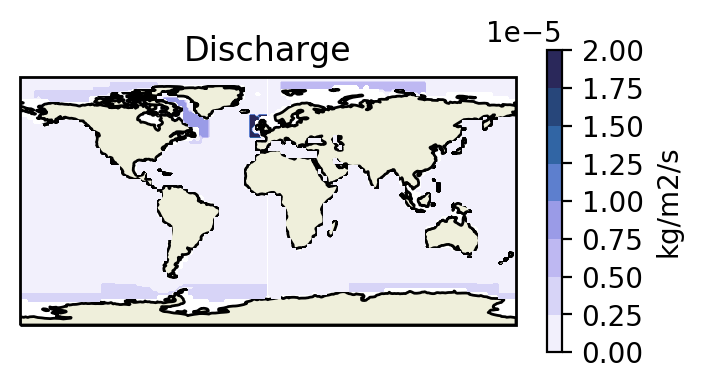

In [10]:
ds_spread = xr.open_dataset("/nfs/annie/eeymr/work/outputs/glac_mw/xosf/temev.discharge.glac_mw.nc", decode_times=False)
print(ds_spread)
print(f"Waterfix flux (Sv): {np.nansum(ds_spread.discharge.isel(t=0)*surface/ro*10**-6)}")

projection_map = ccrs.PlateCarree()
figMap,axMap = plt.subplots(nrows=1, ncols=1, subplot_kw={'projection':projection_map}, figsize=(4,4), dpi=200)

cm = axMap.contourf(ds_spread.longitude, ds_spread.latitude, ds_spread.discharge.isel(t=0), transform=ccrs.PlateCarree(), cmap=SCM6.devon.reversed())
axMap.set_global()
axMap.add_feature(cartopy.feature.LAND, zorder=0, edgecolor='black')
axMap.set_title("Discharge")
cb = figMap.colorbar(mappable=cm, ax=axMap, label="kg/m2/s", shrink=0.5)
cb.formatter.set_powerlimits((0, 0))
cb.ax.yaxis.set_offset_position('right')                         
cb.update_ticks()

!! The waterfix is already applied to this field. We therefore need to remove it first.

In [11]:
ds_wfix_old = xr.open_dataset('/nfs/annie/earpal/database/experiments/temev/inidata/temev.qrparm.waterfix.nc')

<xarray.Dataset>
Dimensions:    (latitude: 144, longitude: 288, t: 211)
Coordinates:
  * t          (t) int64 -21000 -20900 -20800 -20700 -20600 ... -300 -200 -100 0
  * latitude   (latitude) float32 -89.375 -88.125 -86.875 ... 88.125 89.375
  * longitude  (longitude) float32 0.0 1.25 2.5 3.75 ... 356.25 357.5 358.75
Data variables:
    discharge  (t, latitude, longitude) float64 nan nan nan nan ... nan nan nan
Attributes:
    title:        Meltwater discharge for transient GLAC1D last delgaciation ...
    start_year:   -21
    end_year:     0
    step:         100
    mode:         spreaded
    mode_smooth:  diff
    lsm:          temev
    history:      Created 2020-06-11 20:45:24.325024 by Yvan Romé
Waterfix flux (Sv): 0.05182371369649722


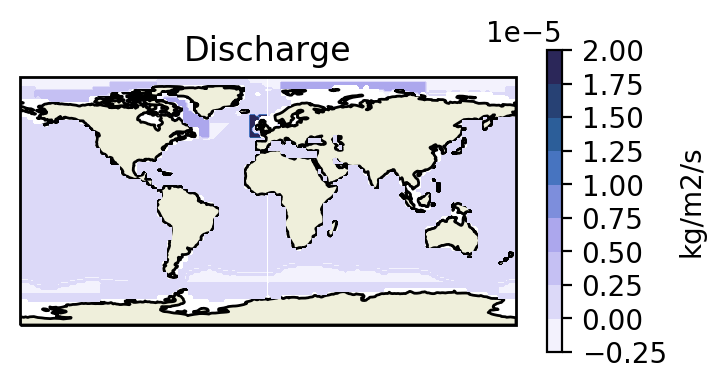

In [12]:
ds_discharge = ds_spread.copy()
ds_discharge.discharge.values = ds_discharge.discharge.values - np.resize(ds_wfix_old.field672.values[0,0,:,:-2], ds_discharge.discharge.values.shape)
print(ds_discharge)
print(f"Waterfix flux (Sv): {np.nansum(ds_discharge.discharge.isel(t=0)*surface/ro*10**-6)}")

projection_map = ccrs.PlateCarree()
figMap,axMap = plt.subplots(nrows=1, ncols=1, subplot_kw={'projection':projection_map}, figsize=(4,4), dpi=200)

cm = axMap.contourf(ds_discharge.longitude, ds_discharge.latitude, ds_discharge.discharge.isel(t=0), transform=ccrs.PlateCarree(), cmap=SCM6.devon.reversed())
axMap.set_global()
axMap.add_feature(cartopy.feature.LAND, zorder=0, edgecolor='black')
axMap.set_title("Discharge")
cb = figMap.colorbar(mappable=cm, ax=axMap, label="kg/m2/s", shrink=0.5)
cb.formatter.set_powerlimits((0, 0))
cb.ax.yaxis.set_offset_position('right')                         
cb.update_ticks()

Rq: Strange pattern with residuals, can apply a where filtering.

And then add the new waterfix:

<xarray.Dataset>
Dimensions:    (latitude: 144, longitude: 288, t: 211)
Coordinates:
  * t          (t) int64 -21000 -20900 -20800 -20700 -20600 ... -300 -200 -100 0
  * latitude   (latitude) float32 -89.375 -88.125 -86.875 ... 88.125 89.375
  * longitude  (longitude) float32 0.0 1.25 2.5 3.75 ... 356.25 357.5 358.75
Data variables:
    discharge  (t, latitude, longitude) float64 nan nan nan nan ... nan nan nan
Attributes:
    title:        Meltwater discharge for transient GLAC1D last delgaciation ...
    start_year:   -21
    end_year:     0
    step:         100
    mode:         spreaded
    mode_smooth:  diff
    lsm:          temev
    history:      Created 2020-06-11 20:45:24.325024 by Yvan Romé
Waterfix flux (Sv): 0.3680467053446768


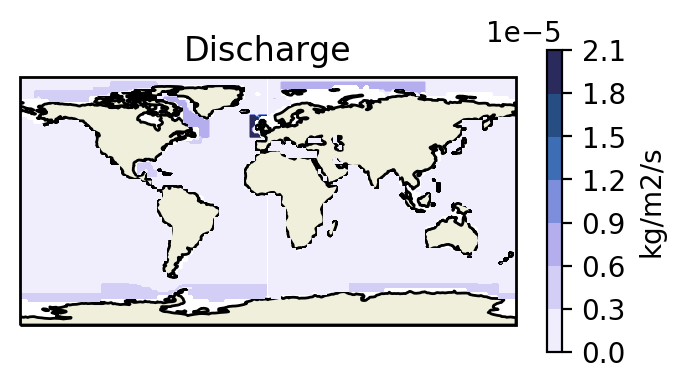

In [13]:
ds_corrected = ds_discharge.copy()
ds_corrected.discharge.values = ds_corrected.discharge.values + np.resize(ds_wfix_corrected.field672.values[0,0,:,:-2], ds_corrected.discharge.values.shape)
print(ds_corrected)
print(f"Waterfix flux (Sv): {np.nansum(ds_corrected.discharge.isel(t=0)*surface/ro*10**-6)}")

projection_map = ccrs.PlateCarree()
figMap,axMap = plt.subplots(nrows=1, ncols=1, subplot_kw={'projection':projection_map}, figsize=(4,4), dpi=200)

cm = axMap.contourf(ds_corrected.longitude, ds_corrected.latitude, ds_corrected.discharge.isel(t=0), transform=ccrs.PlateCarree(), cmap=SCM6.devon.reversed())
axMap.set_global()
axMap.add_feature(cartopy.feature.LAND, zorder=0, edgecolor='black')
axMap.set_title("Discharge")
cb = figMap.colorbar(mappable=cm, ax=axMap, label="kg/m2/s", shrink=0.5)
cb.formatter.set_powerlimits((0, 0))
cb.ax.yaxis.set_offset_position('right')                         
cb.update_ticks()

We can then save the new dataset:

In [14]:
ds_lsm = xr.open_dataset("/nfs/annie/eeymr/work/data/glac_mw/hadcm3_lsm/teadv3.qrparm.omask.nc")

In [15]:
#saving.create_input(ds_corrected, ds_lsm, 'xoup', 'teadv3', 'patched', start_year=-21, end_year=0, step=100,
#                 sav_name="wfix.xoup.glac_mw_p.nc", sav_folder="/nfs/annie/eeymr/work/outputs/glac_mw/xoup", mode_smooth="diff")

## Create LGM simulations

In [29]:
ds_discharge = xr.open_dataset('/nfs/see-fs-01_users/eeymr/work/outputs/glac_mw/xoup/xoup.wfix.glac_ts.nc',decode_times=False)
ds_lsm = xr.open_dataset('/nfs/annie/earpal/database/experiments/temev/inidata/temev.qrparm.omask.nc')
ds_waterfix = xr.open_dataset("/nfs/annie/eeymr/work/data/glac_mw/qrparm.waterfix.hadcm3.nc")
ds_wfix_old = xr.open_dataset('/nfs/annie/earpal/database/experiments/temev/inidata/temev.qrparm.waterfix.nc')
# are ds_wfix and ds_wfix_old the same?

ts = plotting.create_discharge_ts(ds_discharge, ds_lsm, ds_waterfix, unit="kg/m2/s")
t = ds_discharge.t.values
i_minmw = np.where(t==-21500)
i_lgm1mw = np.where(t==-21000)
i_lgm2mw = np.where(t==-20700)
i_namw = np.where(t==-19400)
i_arcmw = np.where(t==-18200)
i_arc2mw = np.where(t==-17800)

flux_na = ts['North_Atlantic']
flux_ns = ts['Nordic seas']
flux_med = ts['Mediterranean']
flux_arc = ts['Arctic']
flux_ss = ts['Southern seas']
flux_pac = ts['Pacific']
flux_tot = ts['Total']

flux_minmw = [np.nanmean([ts['Total'][i] for i in range(i_minmw[0][0]-1,i_minmw[0][0]+1)])]*len(t)
flux_lgm1mw = [np.nanmean([ts['Total'][i] for i in range(i_lgm1mw[0][0]-1,i_lgm1mw[0][0]+1)])]*len(t)
flux_lgm2mw = [np.nanmean([ts['Total'][i] for i in range(i_lgm2mw[0][0]-1,i_lgm2mw[0][0]+1)])]*len(t)
flux_namw = [np.nanmean([ts['Total'][i] for i in range(i_namw[0][0]-1,i_namw[0][0]+1)])]*len(t)
flux_arcmw = [np.nanmean([ts['Total'][i] for i in range(i_arcmw[0][0]-1,i_arcmw[0][0]+1)])]*len(t)
flux_arc2mw = [np.nanmean([ts['Total'][i] for i in range(i_arc2mw[0][0]-1,i_arc2mw[0][0]+1)])+0.002]*len(t)

<generator object create_discharge_ts.<locals>.<genexpr> at 0x2b9ac8c57750>


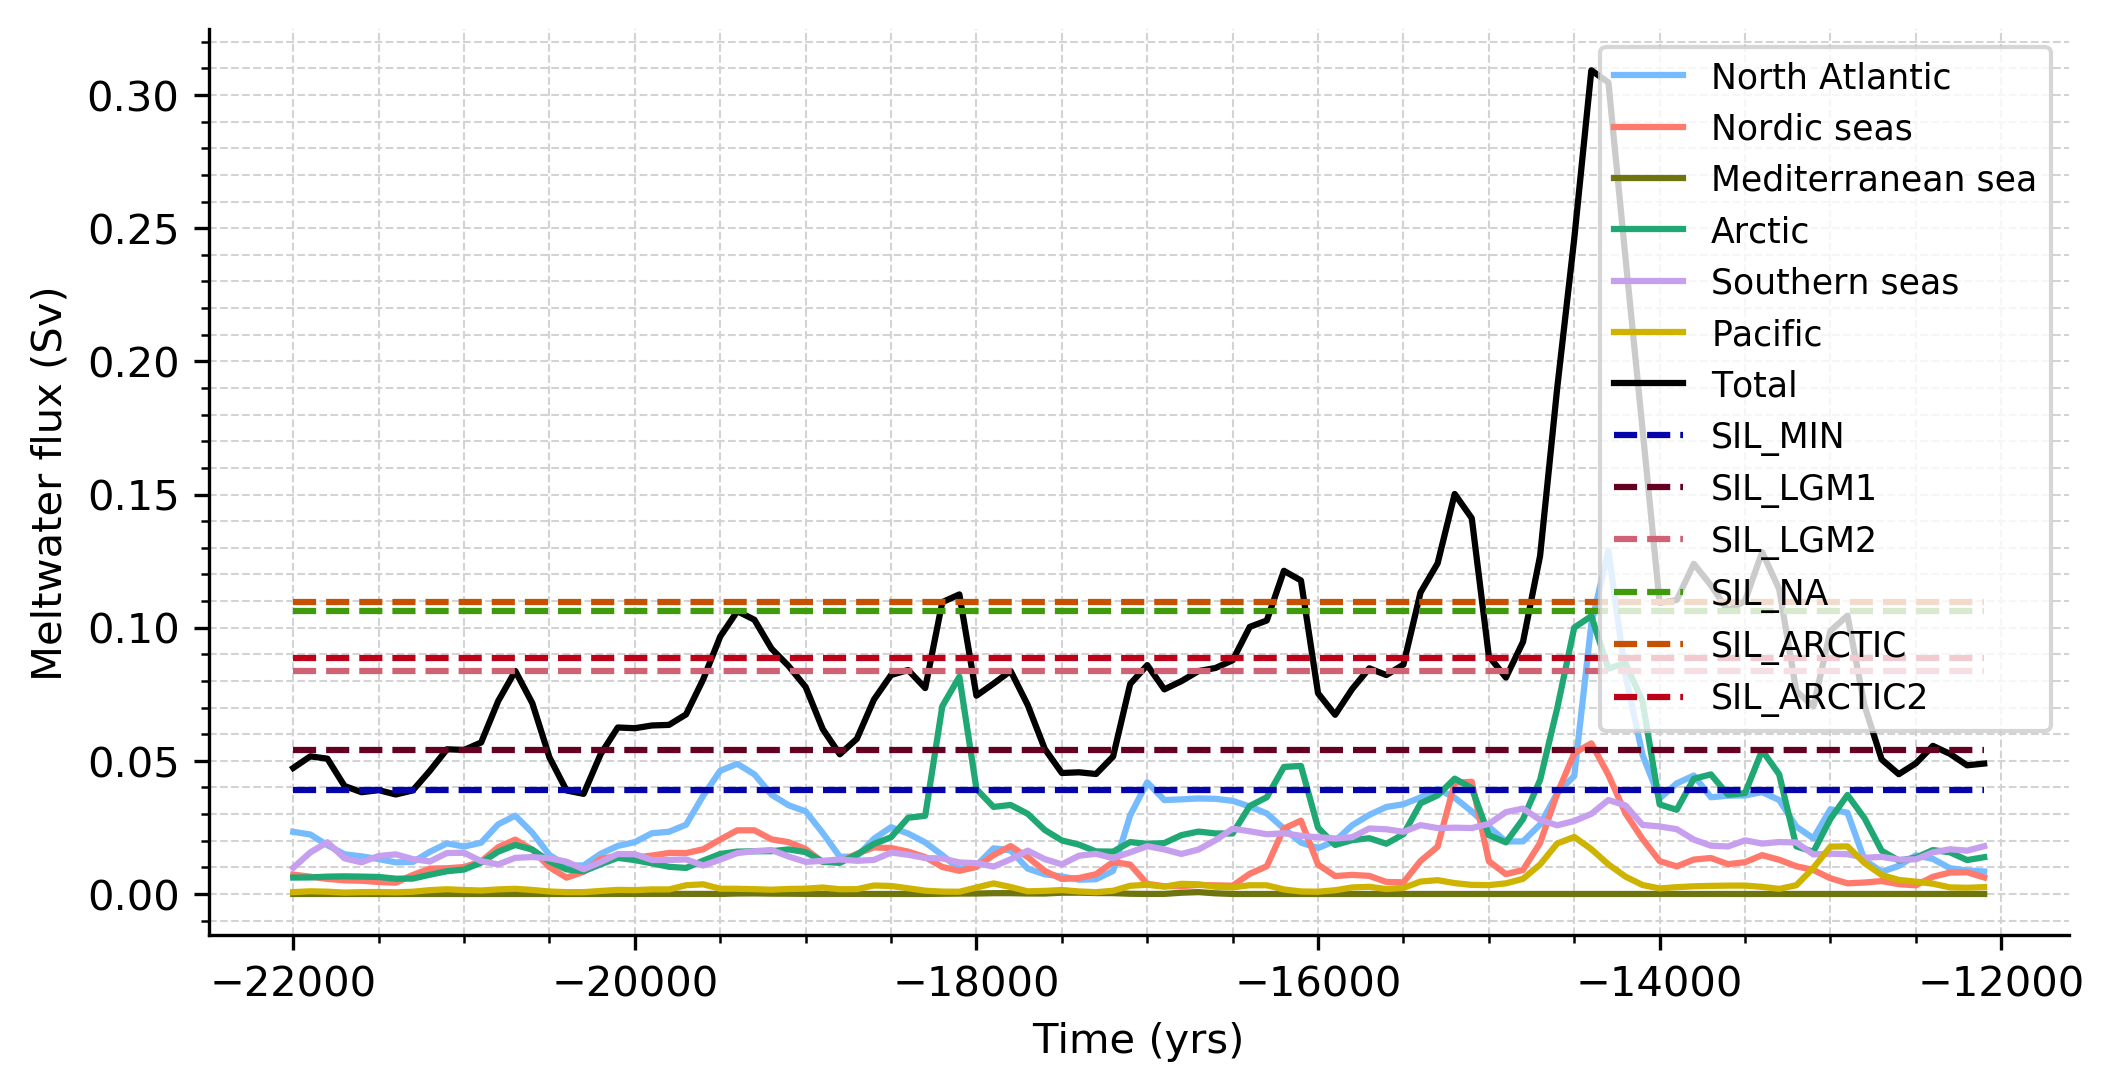

In [34]:
start, end = 40, 140

figMap, axMw = plt.subplots(nrows=1, ncols=1, figsize=(8,4), dpi=300)

axMw.plot(t[start:end], util.running_mean(flux_na[start:end],2), label="North Atlantic", color="xkcd:sky blue", linestyle="-")
axMw.plot(t[start:end], util.running_mean(flux_ns[start:end],2), label="Nordic seas", color="xkcd:salmon", linestyle="-")
axMw.plot(t[start:end], util.running_mean(flux_med[start:end],2), label="Mediterranean sea", color="xkcd:olive", linestyle="-")
axMw.plot(t[start:end], util.running_mean(flux_arc[start:end],2), label="Arctic", color="xkcd:jade", linestyle="-")
axMw.plot(t[start:end], util.running_mean(flux_ss[start:end],2), label="Southern seas", color="xkcd:lavender", linestyle="-")
axMw.plot(t[start:end], util.running_mean(flux_pac[start:end],2), label="Pacific", color="xkcd:mustard", linestyle="-")
axMw.plot(t[start:end], util.running_mean(flux_tot[start:end],2), label="Total", color="black", linestyle="-")
axMw.plot(t[start:end], flux_minmw[start:end], label="SIL_MIN", color="xkcd:royal blue", linestyle="--")
axMw.plot(t[start:end], flux_lgm1mw[start:end], label="SIL_LGM1", color="xkcd:maroon", linestyle="--")
axMw.plot(t[start:end], flux_lgm2mw[start:end], label="SIL_LGM2", color="xkcd:rose", linestyle="--")
axMw.plot(t[start:end], flux_namw[start:end], label="SIL_NA", color="xkcd:grass green", linestyle="--")
axMw.plot(t[start:end], flux_arcmw[start:end], label="SIL_ARCTIC", color="xkcd:dark orange", linestyle="--")
axMw.plot(t[start:end], flux_arc2mw[start:end], label="SIL_ARCTIC2", color="xkcd:scarlet", linestyle="--")

axMw.legend(loc="upper right", fontsize='small')
axMw.spines['right'].set_visible(False)
axMw.spines['top'].set_visible(False)
axMw.set_xlabel("Time (yrs)")
axMw.set_ylabel("Meltwater flux (Sv)")
axMw.minorticks_on()
axMw.grid(which = "both", color='lightgrey', linestyle='--', linewidth=0.5)

In [8]:
ds_spread = xr.open_dataset('/nfs/annie/eeymr/work/outputs/glac_mw/Archive/glac.-26_0_100.diff_s/temev.discharge.glac_mw.nc',decode_times=False)
print(ds_spread)
ds_wfix_old = xr.open_dataset('/nfs/annie/earpal/database/experiments/temev/inidata/temev.qrparm.waterfix.nc')
print(ds_wfix_old)
print(f"Waterfix flux (Sv): {np.nansum(ds_wfix_old.field672.isel(t=0).isel(depth=0)[:,:-2]*surface/ro*10**-6)}")

<xarray.Dataset>
Dimensions:    (latitude: 144, longitude: 288, t: 261)
Coordinates:
  * t          (t) int64 -26000 -25900 -25800 -25700 -25600 ... -300 -200 -100 0
  * latitude   (latitude) float32 -89.375 -88.125 -86.875 ... 88.125 89.375
  * longitude  (longitude) float32 0.0 1.25 2.5 3.75 ... 356.25 357.5 358.75
Data variables:
    discharge  (t, latitude, longitude) float64 ...
Attributes:
    title:        Meltwater discharge for transient GLAC1D last delgaciation ...
    start_year:   -26
    end_year:     0
    step:         100
    mode:         spreaded
    mode_smooth:  diff
    lsm:          temev
    history:      Created 2020-06-04 18:27:59.417797 by Yvan Romé
<xarray.Dataset>
Dimensions:    (depth: 1, latitude: 144, longitude: 290, t: 1)
Coordinates:
  * longitude  (longitude) float32 0.0 1.25 2.5 3.75 ... 358.75 360.0 361.25
  * latitude   (latitude) float32 -89.375 -88.125 -86.875 ... 88.125 89.375
  * depth      (depth) float32 5.0
  * t          (t) object 1800-12-0

### Minimal LGM meltwater experiment

In [76]:
# Finding the local minimum

i_min = 40

for i in range(i_min, i_min+11):
    discharge = (ds_spread.discharge.isel(t=i) - ds_wfix_old.field672.values[0,0,:,:-2])
    discharge_sv = discharge*surface/ro*10**-6 
    t = ds_spread.t.isel(t=i).values

    print(f"Index : {i}; time step: {t}; waterfix flux (Sv): {np.nansum(discharge_sv)}")

Index : 40; time step: -22000; waterfix flux (Sv): 0.04732791034176576
Index : 41; time step: -21900; waterfix flux (Sv): 0.05603663006529582
Index : 42; time step: -21800; waterfix flux (Sv): 0.04556630483789595
Index : 43; time step: -21700; waterfix flux (Sv): 0.03554336994344197
Index : 44; time step: -21600; waterfix flux (Sv): 0.04086983720652998
Index : 45; time step: -21500; waterfix flux (Sv): 0.03713327782600665
Index : 46; time step: -21400; waterfix flux (Sv): 0.03759323812941514
Index : 47; time step: -21300; waterfix flux (Sv): 0.04017841741137645
Index : 48; time step: -21200; waterfix flux (Sv): 0.05234097421501963
Index : 49; time step: -21100; waterfix flux (Sv): 0.0563390685322201
Index : 50; time step: -21000; waterfix flux (Sv): 0.05182371369649722


In [77]:
i_min = 45
discharge = np.nanmean([(ds_spread.discharge.isel(t=i) - ds_wfix_old.field672.values[0,0,:,:-2]) for i in range(i_min-1, i_min+1)], axis=0)
discharge_sv = discharge*surface/ro*10**-6
t = ds_spread.t.isel(t=i_min).values
print(f"Time step: {t}; waterfix flux (Sv): {np.nansum(discharge_sv)}")

Time step: -21500; waterfix flux (Sv): 0.03900155751626832


/nfs/see-fs-01_users/eeymr/.conda/envs/eeymr/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: Mean of empty slice
  


/nfs/see-fs-01_users/eeymr/.conda/envs/eeymr/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in greater
  after removing the cwd from sys.path.


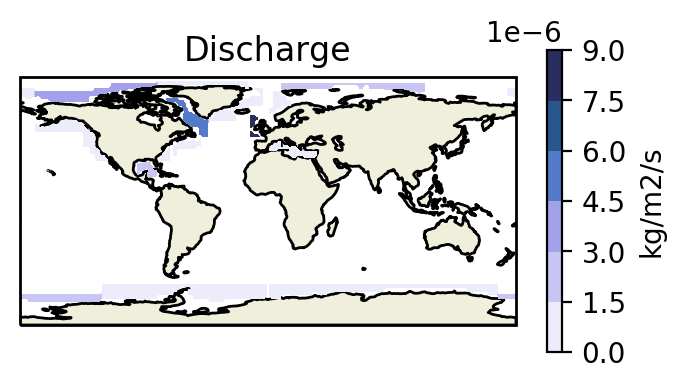

In [12]:
projection_map = ccrs.PlateCarree()
figMap,axMap = plt.subplots(nrows=1, ncols=1, subplot_kw={'projection':projection_map}, figsize=(4,4), dpi=200)

cm = axMap.contourf(ds_spread.longitude, ds_spread.latitude, np.where(discharge>10**-10,discharge,np.nan), transform=ccrs.PlateCarree(), cmap=SCM6.devon.reversed())
axMap.set_global()
axMap.add_feature(cartopy.feature.LAND, zorder=0, edgecolor='black')
axMap.set_title("Discharge")
cb = figMap.colorbar(mappable=cm, ax=axMap, label="kg/m2/s", shrink=0.5)
cb.formatter.set_powerlimits((0, 0))
cb.ax.yaxis.set_offset_position('right')                         
cb.update_ticks()

In [9]:
# and then create the new waterfix

# ds_updated = saving.create_updated_waterfix(discharge, i_min, t, 'teadv3', ds_wfix_old, sav_path="/nfs/annie/eeymr/work/outputs/glac_mw/xoup/xoup.wfix.lgm.nc")

# print(f"New waterfix flux (Sv): {np.nansum(ds_updated.field672.isel(t=0).isel(depth=0)[:,:-2]*surface/ro*10**-6)}")

Mew waterfix flux (Sv): 0.15146411566212872


Quick check-up

In [10]:
ds_test = xr.open_dataset("/nfs/annie/eeymr/work/outputs/glac_mw/xoup/xoup.wfix.lgm.nc")
print(ds_test)

<xarray.Dataset>
Dimensions:    (depth: 1, latitude: 144, longitude: 290, t: 1)
Coordinates:
  * longitude  (longitude) float32 0.0 1.25 2.5 3.75 ... 358.75 360.0 361.25
  * latitude   (latitude) float32 -89.375 -88.125 -86.875 ... 88.125 89.375
  * depth      (depth) float32 5.0
  * t          (t) object 1800-12-01 00:00:00
Data variables:
    field672   (t, depth, latitude, longitude) float32 ...
Attributes:
    history:  Created on 2020-11-24 17:12:35.607907 by Yvan Romé
    title:    Waterfix for HadCM3 simulations [GLAC-1D] - Created using value...


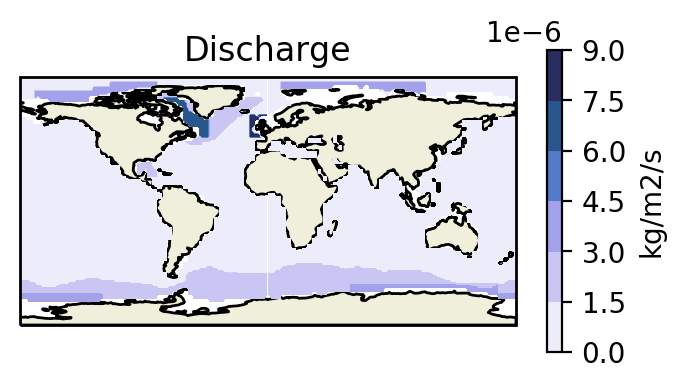

In [11]:
projection_map = ccrs.PlateCarree()
figMap,axMap = plt.subplots(nrows=1, ncols=1, subplot_kw={'projection':projection_map}, figsize=(4,4), dpi=200)

cm = axMap.contourf(ds_spread.longitude, ds_spread.latitude, ds_test.isel(t=0).isel(depth=0).field672[:,:-2], transform=ccrs.PlateCarree(), cmap=SCM6.devon.reversed())
axMap.set_global()
axMap.add_feature(cartopy.feature.LAND, zorder=0, edgecolor='black')
axMap.set_title("Discharge")
cb = figMap.colorbar(mappable=cm, ax=axMap, label="kg/m2/s", shrink=0.5)
cb.formatter.set_powerlimits((0, 0))
cb.ax.yaxis.set_offset_position('right')                         
cb.update_ticks()

### NA meltwater experiment

In [13]:
# Finding the local maximum

i_na = 60

for i in range(i_na, i_na+11):
    discharge = (ds_spread.discharge.isel(t=i) - ds_wfix_old.field672.values[0,0,:,:-2])
    discharge_sv = discharge*surface/ro*10**-6 
    t = ds_spread.t.isel(t=i).values

    print(f"Index : {i}; time step: {t}; waterfix flux (Sv): {np.nansum(discharge)}")

Index : 60; time step: -20000; waterfix flux (Sv): 0.003430605616120044
Index : 61; time step: -19900; waterfix flux (Sv): 0.0031806411446346915
Index : 62; time step: -19800; waterfix flux (Sv): 0.0032015999404146965
Index : 63; time step: -19700; waterfix flux (Sv): 0.003892329032347949
Index : 64; time step: -19600; waterfix flux (Sv): 0.0066723799717830394
Index : 65; time step: -19500; waterfix flux (Sv): 0.008224674307835368
Index : 66; time step: -19400; waterfix flux (Sv): 0.008879257793669023
Index : 67; time step: -19300; waterfix flux (Sv): 0.007754291404141987
Index : 68; time step: -19200; waterfix flux (Sv): 0.006985065846523933
Index : 69; time step: -19100; waterfix flux (Sv): 0.006699197144725239
Index : 70; time step: -19000; waterfix flux (Sv): 0.00478977490265632


In [14]:
i_na = 66
discharge = np.nanmean([(ds_spread.discharge.isel(t=i) - ds_wfix_old.field672.values[0,0,:,:-2]) for i in range(i_na-1, i_na+1)], axis=0)
discharge_sv = discharge*surface/ro*10**-6 
t = ds_spread.t.isel(t=i_na).values
print(f"Time step: {t}; waterfix flux (Sv): {np.nansum(discharge)}")

Time step: -19400; waterfix flux (Sv): 0.008551966050752195


/nfs/see-fs-01_users/eeymr/.conda/envs/eeymr/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: Mean of empty slice
  


/nfs/see-fs-01_users/eeymr/.conda/envs/eeymr/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in greater
  after removing the cwd from sys.path.


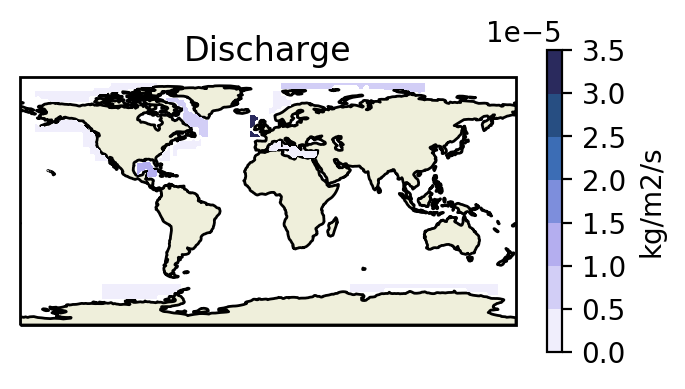

In [15]:
projection_map = ccrs.PlateCarree()
figMap,axMap = plt.subplots(nrows=1, ncols=1, subplot_kw={'projection':projection_map}, figsize=(4,4), dpi=200)

cm = axMap.contourf(ds_spread.longitude, ds_spread.latitude, np.where(discharge>10**-10,discharge,np.nan), transform=ccrs.PlateCarree(), cmap=SCM6.devon.reversed())
axMap.set_global()
axMap.add_feature(cartopy.feature.LAND, zorder=0, edgecolor='black')
axMap.set_title("Discharge")
cb = figMap.colorbar(mappable=cm, ax=axMap, label="kg/m2/s", shrink=0.5)
cb.formatter.set_powerlimits((0, 0))
cb.ax.yaxis.set_offset_position('right')                         
cb.update_ticks()

In [16]:
# and then create the new waterfix

# ds_updated = saving.create_updated_waterfix(discharge, i_na, t, 'teadv3', ds_wfix_old, sav_path="/nfs/annie/eeymr/work/outputs/glac_mw/xoup/xoup.wfix.lgm_na.nc")

# print(f"Mew waterfix flux (Sv): {np.nansum(ds_updated.field672.isel(t=0).isel(depth=0)[:,:-2]*surface/ro*10**-6)}")

Mew waterfix flux (Sv): 0.21864636033609783


In [22]:
ds_test = xr.open_dataset("/nfs/annie/eeymr/work/outputs/glac_mw/xoup/xoup.wfix.lgm_na.nc")

print(f"New waterfix flux (Sv): {np.nansum(ds_test.field672.isel(t=0).isel(depth=0)[:,:-2]*surface/ro*10**-6)}")

New waterfix flux (Sv): 0.21864636033609783


### Arctic meltwater experiment

In [16]:
# Finding the local maximum

i_arc = 70

for i in range(i_arc, i_arc+11):
    discharge = (ds_spread.discharge.isel(t=i) - ds_wfix_old.field672.values[0,0,:,:-2])
    discharge_sv = discharge*surface/ro*10**-6 
    t = ds_spread.t.isel(t=i).values

    print(f"Index : {i}; time step: {t}; waterfix flux (Sv): {np.nansum(discharge_sv)}")

Index : 70; time step: -19000; waterfix flux (Sv): 0.07148900002506625
Index : 71; time step: -18900; waterfix flux (Sv): 0.05234200474468374
Index : 72; time step: -18800; waterfix flux (Sv): 0.052582522676711395
Index : 73; time step: -18700; waterfix flux (Sv): 0.06396832047063673
Index : 74; time step: -18600; waterfix flux (Sv): 0.08207190060509113
Index : 75; time step: -18500; waterfix flux (Sv): 0.08234960188643285
Index : 76; time step: -18400; waterfix flux (Sv): 0.0858515630745549
Index : 77; time step: -18300; waterfix flux (Sv): 0.0687758577078454
Index : 78; time step: -18200; waterfix flux (Sv): 0.1503551547523929
Index : 79; time step: -18100; waterfix flux (Sv): 0.07460084447618322
Index : 80; time step: -18000; waterfix flux (Sv): 0.07432425457675526


In [17]:
i_arc = 78
discharge = np.nanmean([(ds_spread.discharge.isel(t=i) - ds_wfix_old.field672.values[0,0,:,:-2])for i in range(i_arc-1, i_arc+1)], axis=0)
discharge_sv = discharge*surface/ro*10**-6 
t = ds_spread.t.isel(t=i_arc).values
print(f"Time step: {t}; waterfix flux (Sv): {np.nansum(discharge_sv)}")

Time step: -18200; waterfix flux (Sv): 0.10956550623011911


/nfs/see-fs-01_users/eeymr/.conda/envs/eeymr/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: Mean of empty slice
  


/nfs/see-fs-01_users/eeymr/.conda/envs/eeymr/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in greater
  after removing the cwd from sys.path.


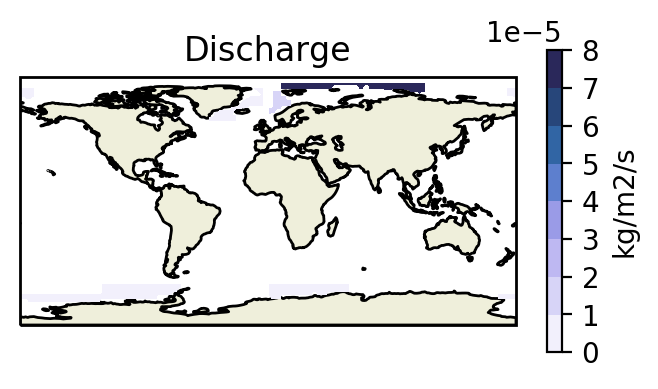

In [19]:
projection_map = ccrs.PlateCarree()
figMap,axMap = plt.subplots(nrows=1, ncols=1, subplot_kw={'projection':projection_map}, figsize=(4,4), dpi=200)

cm = axMap.contourf(ds_spread.longitude, ds_spread.latitude, np.where(discharge>10**-10,discharge,np.nan), transform=ccrs.PlateCarree(), cmap=SCM6.devon.reversed())
axMap.set_global()
axMap.add_feature(cartopy.feature.LAND, zorder=0, edgecolor='black')
axMap.set_title("Discharge")
cb = figMap.colorbar(mappable=cm, ax=axMap, label="kg/m2/s", shrink=0.5)
cb.formatter.set_powerlimits((0, 0))
cb.ax.yaxis.set_offset_position('right')                         
cb.update_ticks()

In [21]:
# and then create the new waterfix

# ds_updated = saving.create_updated_waterfix(discharge, i_arc, t, 'teadv3', ds_wfix_old, sav_path="/nfs/annie/eeymr/work/outputs/glac_mw/xoup/xoup.wfix.lgm_arc.nc")

# print(f"New waterfix flux (Sv): {np.nansum(ds_updated.field672.isel(t=0).isel(depth=0)[:,:-2]*surface/ro*10**-6)}")

Mew waterfix flux (Sv): 0.22202806418557586


In [21]:
ds_test = xr.open_dataset("/nfs/annie/eeymr/work/outputs/glac_mw/xoup/xoup.wfix.lgm_arc.nc")

print(f"New waterfix flux (Sv): {np.nansum(ds_test.field672.isel(t=0).isel(depth=0)[:,:-2]*surface/ro*10**-6)}")

New waterfix flux (Sv): 0.22202806418557586


### Small arctic event - 17.8 k

In [12]:
# Finding the local maximum

i_arc2 = 80

for i in range(i_arc, i_arc+11):
    discharge = (ds_spread.discharge.isel(t=i) - ds_wfix_old.field672.values[0,0,:,:-2])
    discharge_sv = discharge*surface/ro*10**-6 
    t = ds_spread.t.isel(t=i).values

    print(f"Index : {i}; time step: {t}; waterfix flux (Sv): {np.nansum(discharge_sv)}")

Index : 80; time step: -18000; waterfix flux (Sv): 0.07432425457675526
Index : 81; time step: -17900; waterfix flux (Sv): 0.08365831983624142
Index : 82; time step: -17800; waterfix flux (Sv): 0.0838433753195278
Index : 83; time step: -17700; waterfix flux (Sv): 0.05812180270347474
Index : 84; time step: -17600; waterfix flux (Sv): 0.05082923583348149
Index : 85; time step: -17500; waterfix flux (Sv): 0.04002246839763563
Index : 86; time step: -17400; waterfix flux (Sv): 0.051359702543135294
Index : 87; time step: -17300; waterfix flux (Sv): 0.03874129794847419
Index : 88; time step: -17200; waterfix flux (Sv): 0.06446194976001686
Index : 89; time step: -17100; waterfix flux (Sv): 0.09323265903202486
Index : 90; time step: -17000; waterfix flux (Sv): 0.07862801342042718


In [16]:
i_arc2 = 82
discharge = np.nanmean([(ds_discharge.discharge.isel(t=i) - ds_waterfix.field672.values[0,0,:,:-2])for i in range(i_arc2-1, i_arc2+1)], axis=0)
discharge_sv = discharge*surface/ro*10**-6 
t = ds_discharge.t.isel(t=i_arc2).values
print(f"Time step: {t}; waterfix flux (Sv): {np.nansum(discharge_sv)}")

Time step: -17800; waterfix flux (Sv): 0.0837508475778846


/nfs/see-fs-01_users/eeymr/.conda/envs/eeymr/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: Mean of empty slice
  


/nfs/see-fs-01_users/eeymr/.conda/envs/eeymr/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in greater
  after removing the cwd from sys.path.


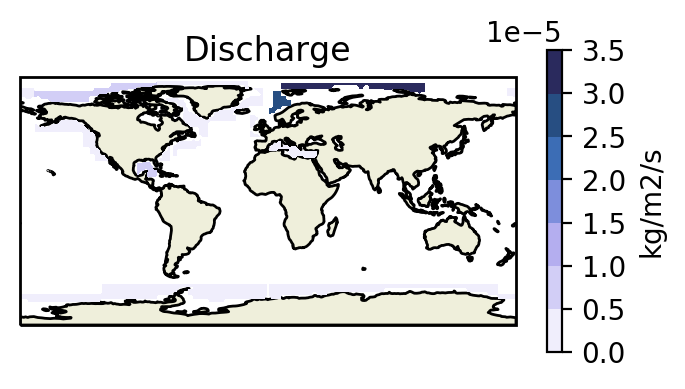

In [17]:
projection_map = ccrs.PlateCarree()
figMap,axMap = plt.subplots(nrows=1, ncols=1, subplot_kw={'projection':projection_map}, figsize=(4,4), dpi=200)

cm = axMap.contourf(ds_discharge.longitude, ds_discharge.latitude, np.where(discharge>10**-10,discharge,np.nan), transform=ccrs.PlateCarree(), cmap=SCM6.devon.reversed())
axMap.set_global()
axMap.add_feature(cartopy.feature.LAND, zorder=0, edgecolor='black')
axMap.set_title("Discharge")
cb = figMap.colorbar(mappable=cm, ax=axMap, label="kg/m2/s", shrink=0.5)
cb.formatter.set_powerlimits((0, 0))
cb.ax.yaxis.set_offset_position('right')                         
cb.update_ticks()

In [18]:
# and then create the new waterfix

# ds_updated = saving.create_updated_waterfix(discharge, i_arc2, t, 'teadv3', ds_wfix_old, sav_path="/nfs/annie/eeymr/work/outputs/glac_mw/xoup/xoup.wfix.arc2.nc")

# print(f"New waterfix flux (Sv): {np.nansum(ds_updated.field672.isel(t=0).isel(depth=0)[:,:-2]*surface/ro*10**-6)}")

New waterfix flux (Sv): 0.196213406400329


In [19]:
ds_test = xr.open_dataset("/nfs/annie/eeymr/work/outputs/glac_mw/xoup/xoup.wfix.arc2.nc")

print(f"New waterfix flux (Sv): {np.nansum(ds_test.field672.isel(t=0).isel(depth=0)[:,:-2]*surface/ro*10**-6)}")

New waterfix flux (Sv): 0.196213406400329


### Intermediate LGM experiment - 21K

In [7]:
# Finding the local maximum

i_lgm1 = 50

for i in range(i_lgm1, i_lgm1+11):
    discharge = (ds_discharge.discharge.isel(t=i) - ds_waterfix.field672.values[0,0,:,:-2])
    discharge_sv = discharge*surface/ro*10**-6 
    t = ds_discharge.t.isel(t=i).values

    print(f"Index : {i}; time step: {t}; waterfix flux (Sv): {np.nansum(discharge_sv)}")

Index : 50; time step: -21000; waterfix flux (Sv): 0.05182371369649722
Index : 51; time step: -20900; waterfix flux (Sv): 0.06194259853581164
Index : 52; time step: -20800; waterfix flux (Sv): 0.08298182963623041
Index : 53; time step: -20700; waterfix flux (Sv): 0.08451257324705753
Index : 54; time step: -20600; waterfix flux (Sv): 0.058710413905834376
Index : 55; time step: -20500; waterfix flux (Sv): 0.04389911525001095
Index : 56; time step: -20400; waterfix flux (Sv): 0.03384201601820437
Index : 57; time step: -20300; waterfix flux (Sv): 0.04134925671494318
Index : 58; time step: -20200; waterfix flux (Sv): 0.06371372193690822
Index : 59; time step: -20100; waterfix flux (Sv): 0.06132024814033279
Index : 60; time step: -20000; waterfix flux (Sv): 0.06317076325121233


In [9]:
i_lgm1 = 50
discharge = np.nanmean([(ds_discharge.discharge.isel(t=i) - ds_waterfix.field672.values[0,0,:,:-2])for i in range(i_lgm1-1, i_lgm1+1)], axis=0)
discharge_sv = discharge*surface/ro*10**-6 
t = ds_discharge.t.isel(t=i_lgm1).values
print(f"Time step: {t}; waterfix flux (Sv): {np.nansum(discharge_sv)}")

Time step: -21000; waterfix flux (Sv): 0.05408139111435866


/nfs/see-fs-01_users/eeymr/.conda/envs/eeymr/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: Mean of empty slice
  


/nfs/see-fs-01_users/eeymr/.conda/envs/eeymr/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in greater
  after removing the cwd from sys.path.


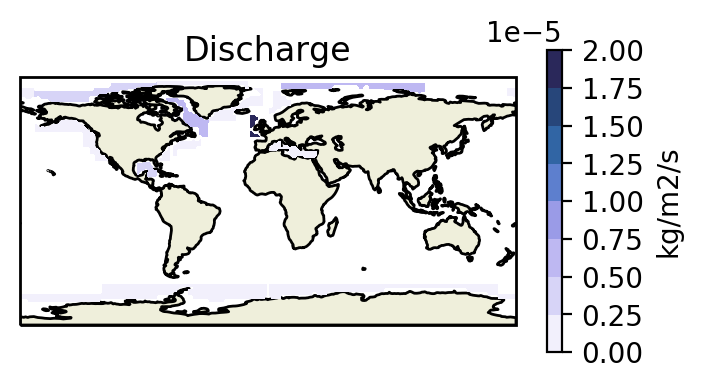

In [10]:
projection_map = ccrs.PlateCarree()
figMap,axMap = plt.subplots(nrows=1, ncols=1, subplot_kw={'projection':projection_map}, figsize=(4,4), dpi=200)

cm = axMap.contourf(ds_discharge.longitude, ds_discharge.latitude, np.where(discharge>10**-10,discharge,np.nan), transform=ccrs.PlateCarree(), cmap=SCM6.devon.reversed())
axMap.set_global()
axMap.add_feature(cartopy.feature.LAND, zorder=0, edgecolor='black')
axMap.set_title("Discharge")
cb = figMap.colorbar(mappable=cm, ax=axMap, label="kg/m2/s", shrink=0.5)
cb.formatter.set_powerlimits((0, 0))
cb.ax.yaxis.set_offset_position('right')                         
cb.update_ticks()

In [11]:
# and then create the new waterfix

# ds_updated = saving.create_updated_waterfix(discharge, i_lgm1, t, 'teadv3', ds_wfix_old, sav_path="/nfs/annie/eeymr/work/outputs/glac_mw/xoup/xoup.wfix.lgm1.nc")

# print(f"New waterfix flux (Sv): {np.nansum(ds_updated.field672.isel(t=0).isel(depth=0)[:,:-2]*surface/ro*10**-6)}")

New waterfix flux (Sv): 0.16654394822553364


In [23]:
ds_test = xr.open_dataset("/nfs/annie/eeymr/work/outputs/glac_mw/xoup/xoup.wfix.lgm1.nc")

print(f"New waterfix flux (Sv): {np.nansum(ds_test.field672.isel(t=0).isel(depth=0)[:,:-2]*surface/ro*10**-6)}")

New waterfix flux (Sv): 0.16654394822553364


### Intermediate LGM experiment - 20.7K

In [13]:
i_lgm2 = 53
discharge = np.nanmean([(ds_discharge.discharge.isel(t=i) - ds_waterfix.field672.values[0,0,:,:-2])for i in range(i_lgm2-1, i_lgm2+1)], axis=0)
discharge_sv = discharge*surface/ro*10**-6 
t = ds_discharge.t.isel(t=i_lgm2).values
print(f"Time step: {t}; waterfix flux (Sv): {np.nansum(discharge_sv)}")

Time step: -20700; waterfix flux (Sv): 0.08374720144164398


/nfs/see-fs-01_users/eeymr/.conda/envs/eeymr/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: Mean of empty slice
  


/nfs/see-fs-01_users/eeymr/.conda/envs/eeymr/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in greater
  after removing the cwd from sys.path.


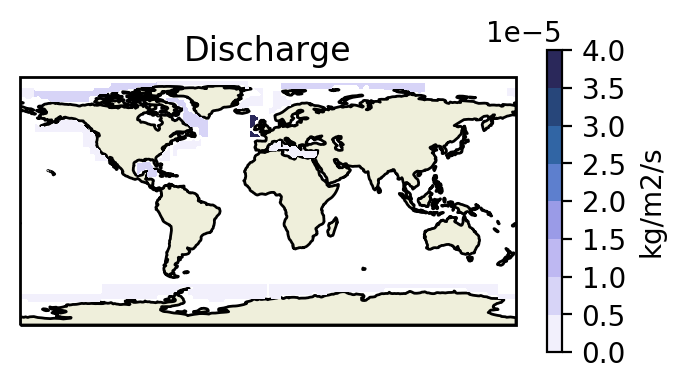

In [14]:
projection_map = ccrs.PlateCarree()
figMap,axMap = plt.subplots(nrows=1, ncols=1, subplot_kw={'projection':projection_map}, figsize=(4,4), dpi=200)

cm = axMap.contourf(ds_discharge.longitude, ds_discharge.latitude, np.where(discharge>10**-10,discharge,np.nan), transform=ccrs.PlateCarree(), cmap=SCM6.devon.reversed())
axMap.set_global()
axMap.add_feature(cartopy.feature.LAND, zorder=0, edgecolor='black')
axMap.set_title("Discharge")
cb = figMap.colorbar(mappable=cm, ax=axMap, label="kg/m2/s", shrink=0.5)
cb.formatter.set_powerlimits((0, 0))
cb.ax.yaxis.set_offset_position('right')                         
cb.update_ticks()

In [15]:
# and then create the new waterfix

# ds_updated = saving.create_updated_waterfix(discharge, i_lgm2, t, 'teadv3', ds_wfix_old, sav_path="/nfs/annie/eeymr/work/outputs/glac_mw/xoup/xoup.wfix.lgm2.nc")

# print(f"New waterfix flux (Sv): {np.nansum(ds_updated.field672.isel(t=0).isel(depth=0)[:,:-2]*surface/ro*10**-6)}")

New waterfix flux (Sv): 0.1962097591734412


In [24]:
ds_test = xr.open_dataset("/nfs/annie/eeymr/work/outputs/glac_mw/xoup/xoup.wfix.lgm2.nc")

print(f"New waterfix flux (Sv): {np.nansum(ds_test.field672.isel(t=0).isel(depth=0)[:,:-2]*surface/ro*10**-6)}")

New waterfix flux (Sv): 0.1962097591734412


### Uncorrected meltwater file (old method)

To create uncorrected routed and spreaded dataset, the syntax is:

In [24]:
ds_hice = xr.open_dataset('/nfs/annie/eeymr/work/data/glac_mw/GLAC1DHiceF26.nc')
ds_pointer = xr.open_dataset('/nfs/annie/eeymr/work/data/glac_mw/GLAC1DdrainagePointerF26ka.nc')
ds_wfix = xr.open_dataset("/nfs/annie/earpal/database/experiments/temev/inidata/temev.qrparm.waterfix.nc")
ds_lsm = xr.open_dataset("/nfs/annie/earpal/database/experiments/temev/inidata/temev.qrparm.omask.nc") 

Create routed file

In [29]:
routed_mw = routing.routing(ds_hice, ds_pointer, ds_lsm, mode_flux="Volume", mode_lon="double",
                            mode_shape="cross", mode_smooth="differential", t_debug=10)

saving.saving(routed_mw, ds_lsm, 'temev', mode="routed", start_year=-21, end_year=-20, step=100,
              mode_smooth="diff")

__ Routing algorithm
Reuse existing file: conservative_720x720_144x288.nc
____ Computation time step : 0.
____ Routing method.
____ Overlapping method with double-cross mode.
____ Applying mask processing with differential mode.
____ Computation time step : 1.
____ Routing method.
____ Overlapping method with double-cross mode.
____ Applying mask processing with differential mode.
____ Computation time step : 2.
____ Routing method.
____ Overlapping method with double-cross mode.
____ Applying mask processing with differential mode.
____ Computation time step : 3.
____ Routing method.
____ Overlapping method with double-cross mode.
____ Applying mask processing with differential mode.
____ Computation time step : 4.
____ Routing method.
____ Overlapping method with double-cross mode.
____ Applying mask processing with differential mode.
____ Computation time step : 5.
____ Routing method.
____ Overlapping method with double-cross mode.
____ Applying mask processing with differential mo

FileNotFoundError: [Errno 2] No such file or directory: '/nfs/annie/eeymr/work/outputs/proj_glac_mw/glac.-21_-20_100.diff'

Create spreaded file

In [ ]:
spreaded_mw = spreading.spreading(routed_mw, ds_lsm, ds_wfix)

saving.saving(spreaded_mw, ds_lsm, experiment, mode="spreaded", start_year=-21, end_year=-20, step=100,
              mode_smooth="diff")